# LTL to automata

SPOT can translate any LTL formula into a (deterministic) $\omega$-automaton,
however let us first have a look at the different modal operators that exist in LTL.

Note that SPOT "only" works on $\omega$-automata, so finite expressions are extended

In [1]:
from AAA_utils import *
spot.setup()

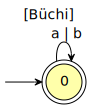

In [2]:
# Global operator G: Something holds everywhere
spot.translate("G(a|b)") #Automatically deduces atomic propositions

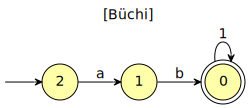

In [3]:
# Next operator X: Something holds in the next step
spot.translate("a&X(b)") #Initially a has to hold, then b

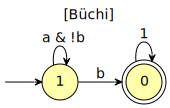

In [4]:
# Until operator U: Something must hold until something else becomes true
spot.translate("a U b")

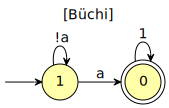

In [5]:
# Finally operator F: At some point something must be true
spot.translate("Fa") #Sugar for "True U a"

In [6]:
## Often used

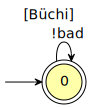

In [7]:
# Safety: something bad will never happen
# Fancy way of saying
spot.translate("G(~bad)")

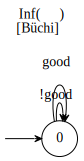

In [8]:
# Liveness: Something good will happen infinitely often
spot.translate("G(F(good))").show("bKR")

In [9]:
# A real formula:
# We want liveness for good, safety for bad but also that two times good in a row forces bad happen

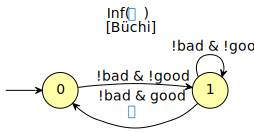

In [10]:
spot.translate("~good & G(F(good)) & G(~bad) & G((good & X good) -> (XX bad))")

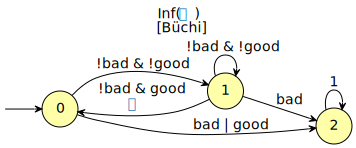

In [11]:
spot.translate("~good & G(F(good)) & G(~bad) & G((good & X good) -> (XX bad))", "complete")

In [12]:
# What happens if you need multiple liveness conditions?
# Try sth out
Your code here
# Could this be expressed with a Büchi automaton? A monitor (automaton with acceptance condition T)?

SyntaxError: invalid syntax (3401710425.py, line 3)

In [ ]:
## Guess the formula
aut = spot.automaton("""HOA: v1
States: 4
Start: 3
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc deterministic
properties: terminal
--BODY--
State: 0
[1] 2
State: 1
[!1] 2
State: 2
[t] 2 {0}
State: 3
[!0] 0
[0] 1
--END--""")
aut.show("bKR")

In [ ]:
f = "a->b" #Replace this with your (correct) formula
# Check if they are equivalent
print(spot.are_equivalent(aut, f))

In [ ]:
aut = spot.automaton("""HOA: v1
States: 4
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc complete
properties: deterministic weak
--BODY--
State: 0
[0&1] 0 {0}
[!0&1] 2 {0}
[!1] 3 {0}
State: 1
[t] 2
State: 2
[0] 0 {0}
[!0] 2 {0}
State: 3
[t] 3
--END--""")
aut.show("bKR")

In [ ]:
f = "a->!b" #Replace this with your (correct) formula
# Check if they are equivalent
print(spot.are_equivalent(aut, f))